In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train.csv', 'sample_submission.csv']


In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [3]:
print(os.listdir("../input/"))

['test', 'train.csv', 'sample_submission.csv']


In [4]:
test_folder_files = os.listdir("../input/test")
print(test_folder_files[:10])  # print first 10
print("\nNumber of files in the test folder", len(test_folder_files))

['seg_0b082e.csv', 'seg_9e7dff.csv', 'seg_b6c10d.csv', 'seg_4435bd.csv', 'seg_c09a41.csv', 'seg_31ddc5.csv', 'seg_71238c.csv', 'seg_6a05e7.csv', 'seg_d47aba.csv', 'seg_eea20e.csv']

Number of files in the test folder 2624


In [5]:
test_file = pd.read_csv('../input/test/seg_0b082e.csv')
print("Segment shape", test_file.shape)
test_file.head()

Segment shape (150000, 1)


,acoustic_data
0,3
1,10
2,4
3,4
4,1


In [6]:
sample_sub = pd.read_csv('../input/sample_submission.csv')
print("Submission shape", sample_sub.shape)
sample_sub.head()

Submission shape (2624, 2)


,seg_id,time_to_failure
0,seg_00030f,0
1,seg_0012b5,0
2,seg_00184e,0
3,seg_003339,0
4,seg_0042cc,0


In [7]:
%%time
train = pd.read_csv('../input/train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

CPU times: user 2min 22s, sys: 12.6 s, total: 2min 35s
Wall time: 2min 36s


In [8]:
pd.set_option("display.precision", 15)  # show more decimals
train.head()

,acoustic_data,time_to_failure
0,12,1.469099998474121
1,6,1.469099998474121
2,8,1.469099998474121
3,5,1.469099998474121
4,8,1.469099998474121


In [9]:
print('The training data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

The training data has 629145480 rows and 2 columns


In [10]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
#rows = 150_000
rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          
    

100%|██████████| 419/419 [07:15<00:00,  1.00s/it]


In [11]:
X = X_train
Y= y_train


In [12]:
X.shape

(419, 35)

In [13]:
#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:219]
X_test = X[-200:]
y_train = Y[:219]
y_test = Y[-200:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 12,
 'min_samples_leaf': 12,
 'max_features': 'log2',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.38725530616610093
r2_score_sqrtTime: 0.6533561866387798


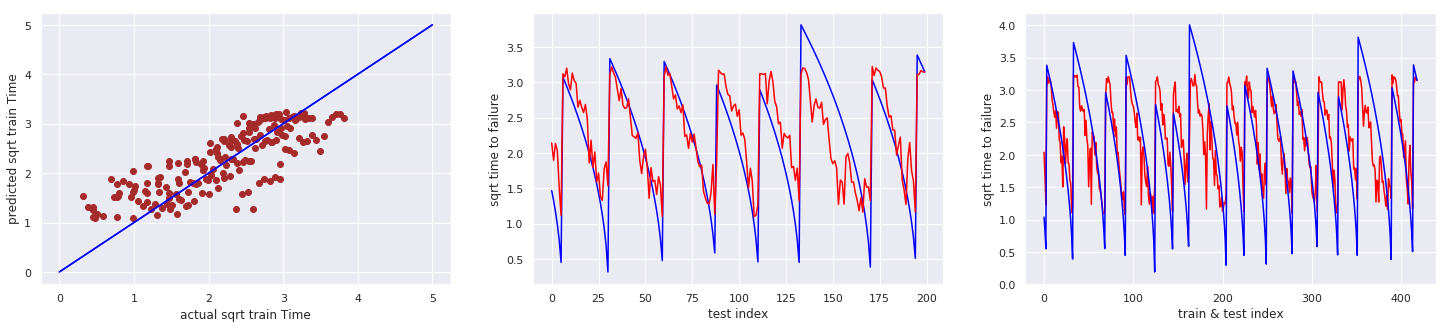

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.6190795417217192
r2_score: 0.653517157196025


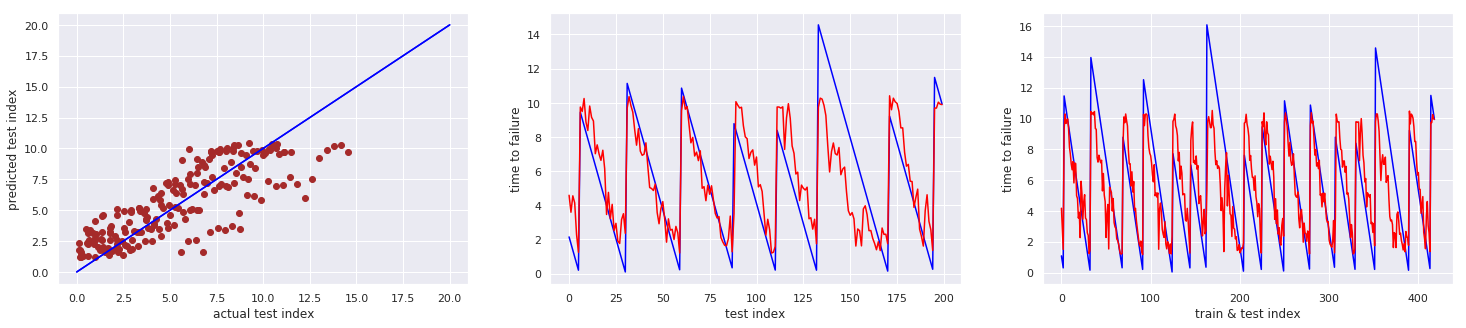

In [16]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_0 = mean_absolute_error(y_test_nolog, y_predict)
R2_0=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

## Part II: Try diff. time windows

### 500,000

In [17]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 1258/1258 [06:15<00:00,  3.61it/s]


In [18]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:658]
X_test = X[-600:]
y_train = Y[:658]
y_test = Y[-600:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 8}

mean_absolute_error_sqrtTime: 0.41718656750098027
r2_score_sqrtTime: 0.5191495801445464


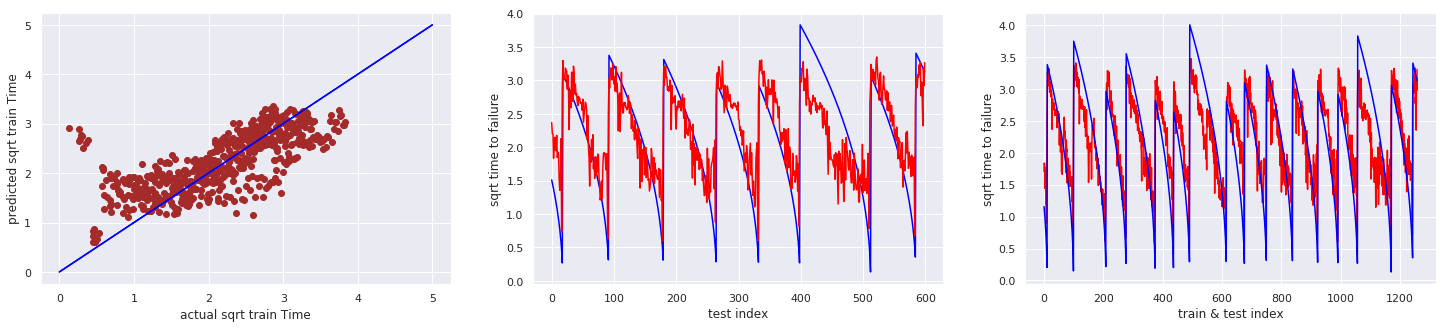

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.7480841704256609
r2_score: 0.5573531207682492


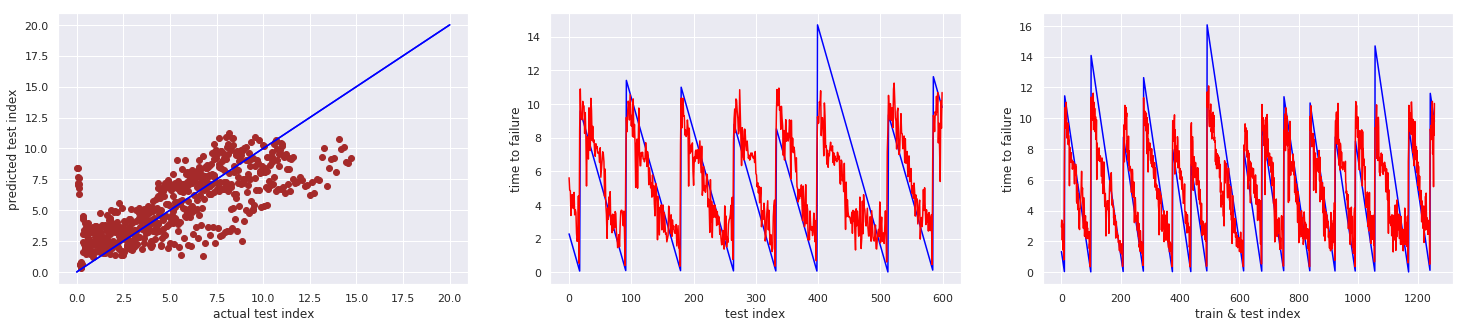

In [20]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_1 = mean_absolute_error(y_test_nolog, y_predict)
R2_1=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

### 2.5M

In [21]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 2_500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 251/251 [07:19<00:00,  1.74s/it]


In [22]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:126]
X_test = X[-125:]
y_train = Y[:126]
y_test = Y[-125:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 8}

mean_absolute_error_sqrtTime: 0.4092812796503359
r2_score_sqrtTime: 0.5784082993156843


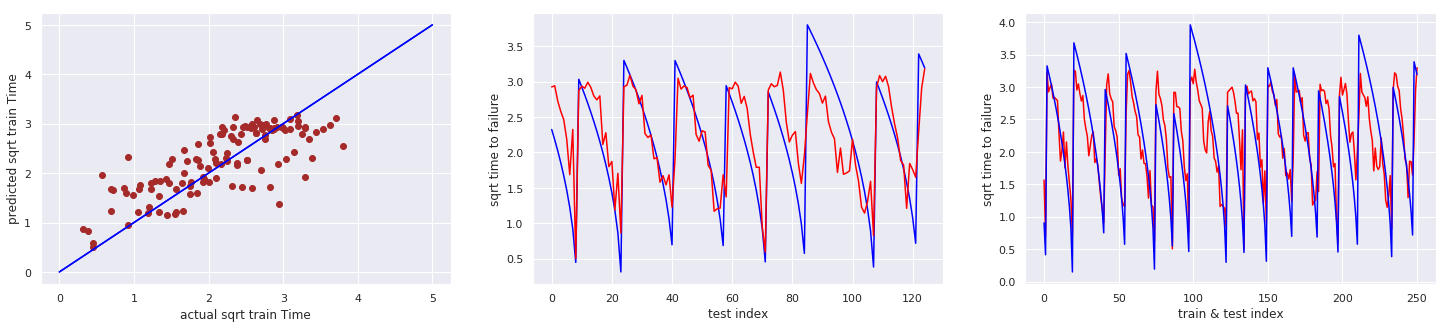

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.780750533752701
r2_score: 0.5150820306785995


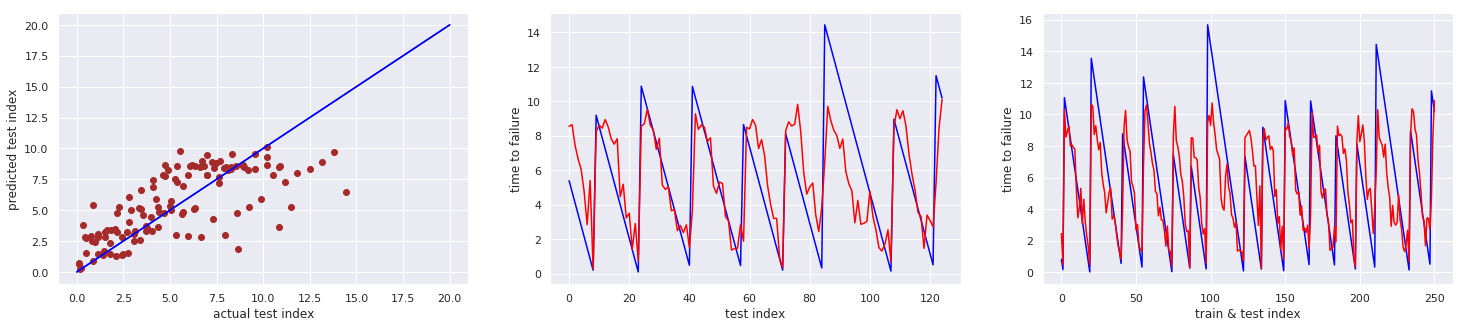

In [24]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_2 = mean_absolute_error(y_test_nolog, y_predict)
R2_2=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

### 3.5M

In [25]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 3_500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 179/179 [07:05<00:00,  2.29s/it]


In [26]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:90]
X_test = X[-89:]
y_train = Y[:90]
y_test = Y[-89:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.3943627097496871
r2_score_sqrtTime: 0.6113267071266435


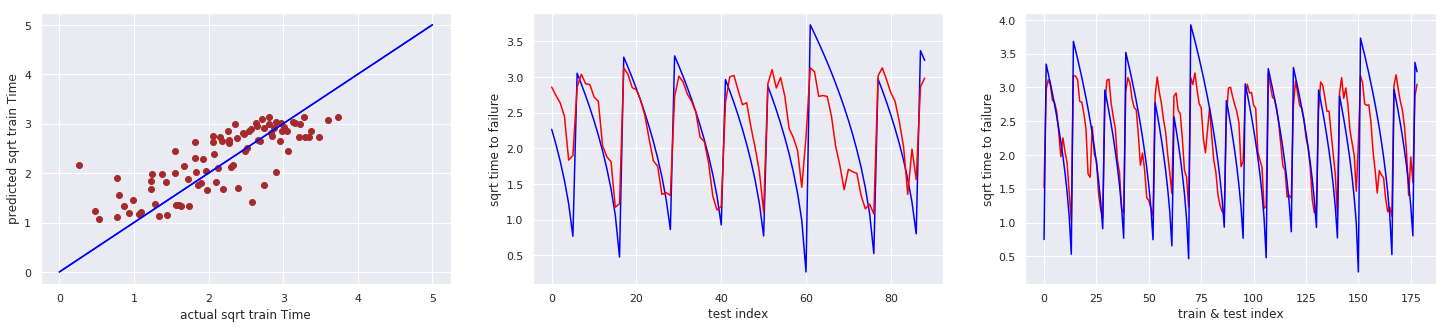

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.668317865686836
r2_score: 0.6160346688244114


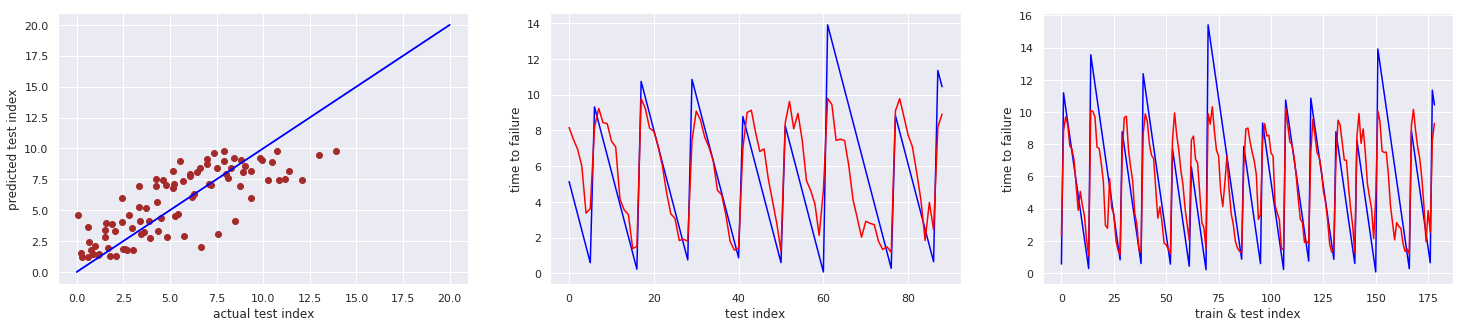

In [28]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_3 = mean_absolute_error(y_test_nolog, y_predict)
R2_3=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

### 4.5M

In [29]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 4_500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 139/139 [10:12<00:00,  4.46s/it]


In [30]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:70]
X_test = X[-69:]
y_train = Y[:70]
y_test = Y[-69:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.4279775006375109
r2_score_sqrtTime: 0.6240594864856228


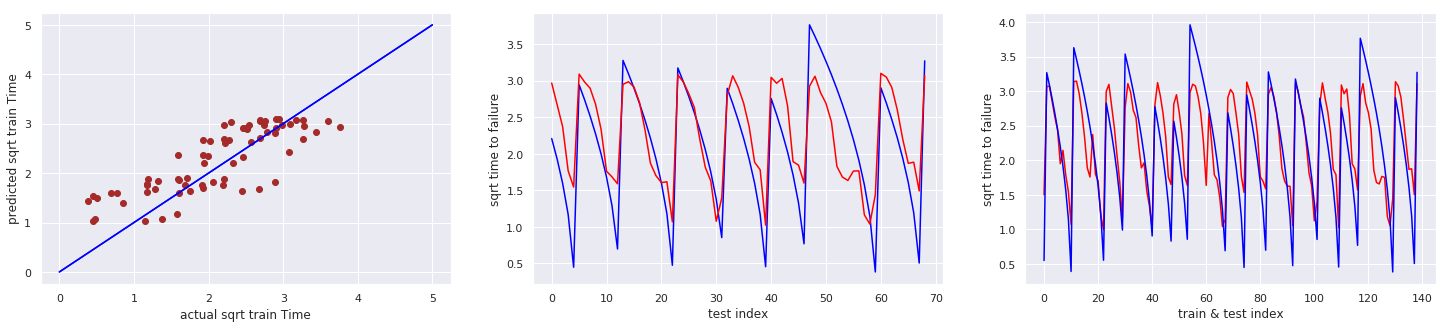

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.7368353467592168
r2_score: 0.6105458862963862


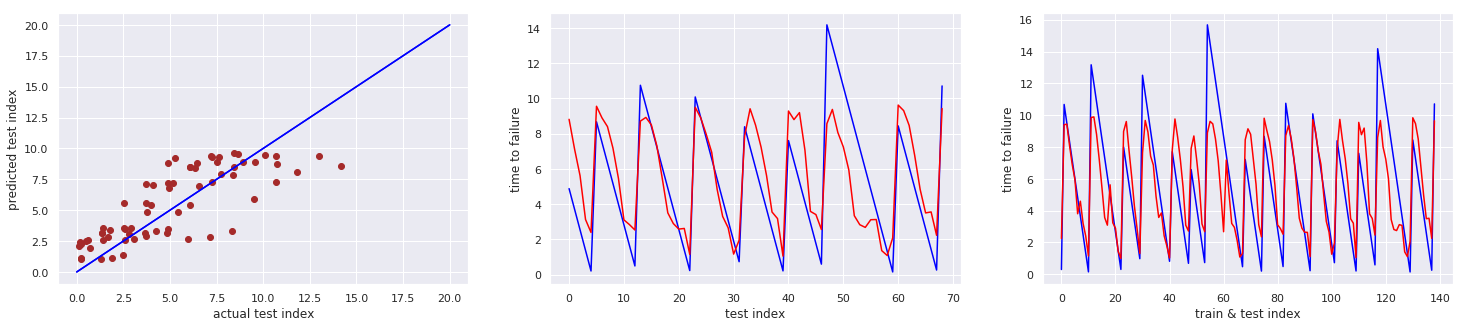

In [32]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_4 = mean_absolute_error(y_test_nolog, y_predict)
R2_4=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

### 5.5M

In [33]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 5_500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 114/114 [09:53<00:00,  5.27s/it]


In [34]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:57]
X_test = X[-57:]
y_train = Y[:57]
y_test = Y[-57:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.4398127433791015
r2_score_sqrtTime: 0.5885463282475403


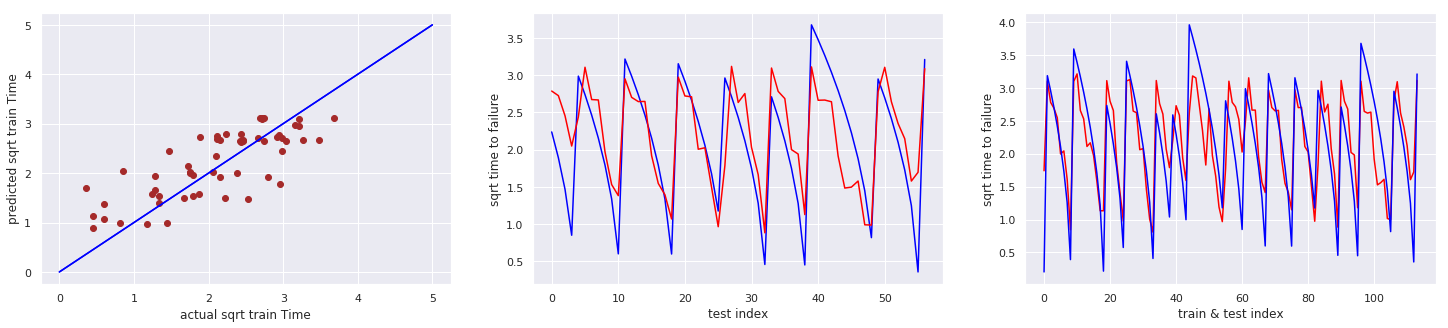

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.8208095623655514
r2_score: 0.5544217324393264


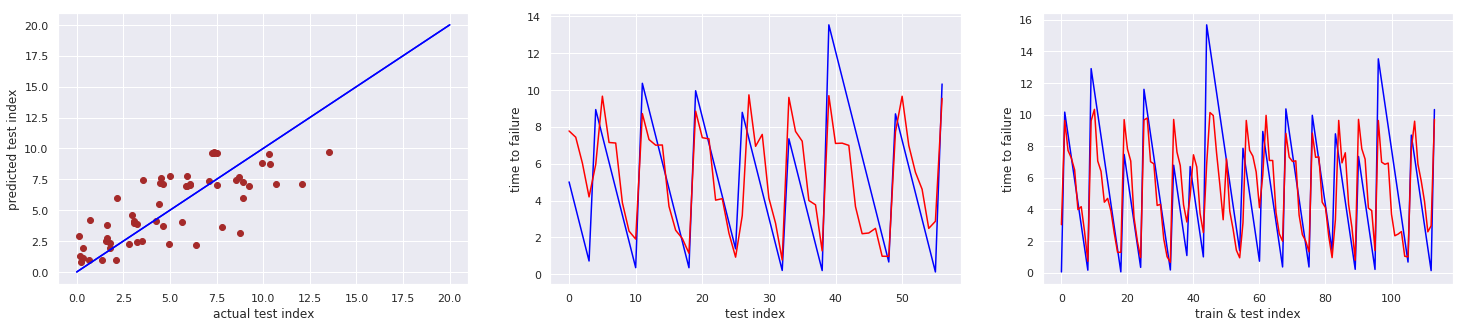

In [36]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_5 = mean_absolute_error(y_test_nolog, y_predict)
R2_5=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

### 6.5M

In [37]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 6_500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 96/96 [10:01<00:00,  6.55s/it]


In [38]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:48]
X_test = X[-48:]
y_train = Y[:48]
y_test = Y[-48:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.4532462403832587
r2_score_sqrtTime: 0.5513623796193003


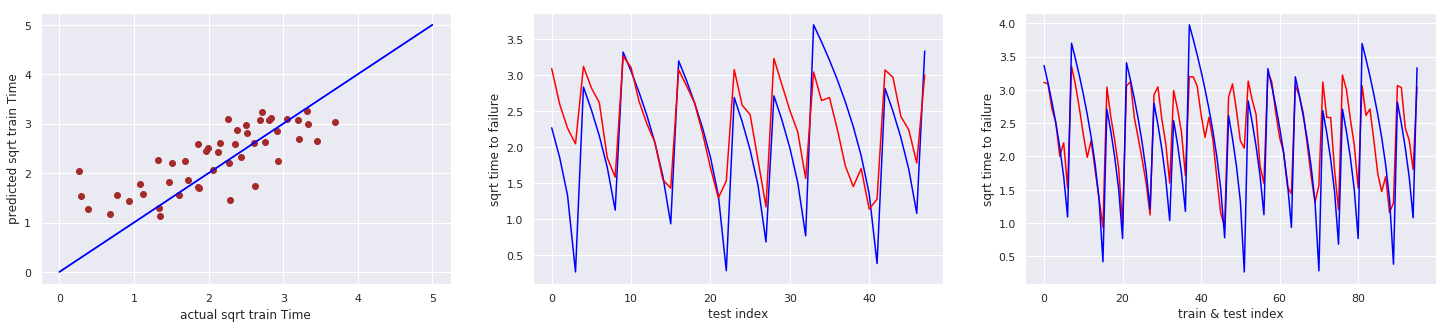

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.8204067368187227
r2_score: 0.5769657713227188


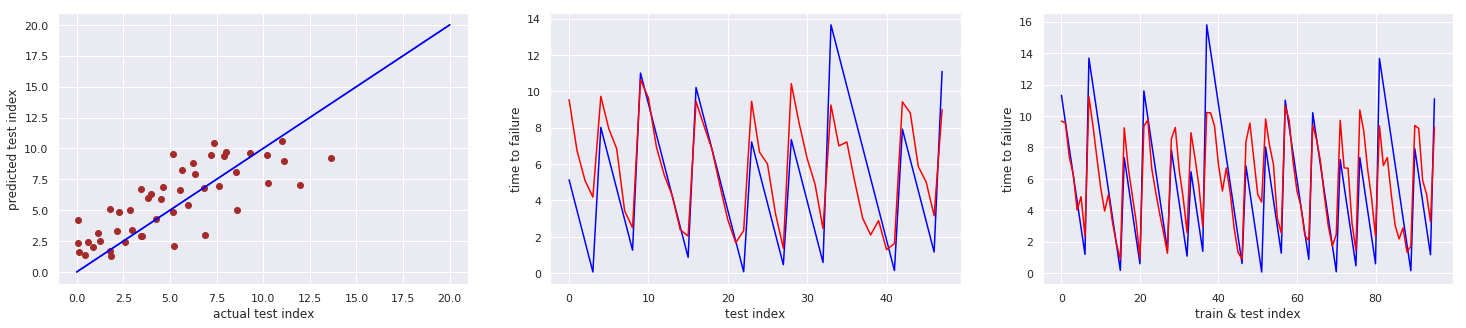

In [40]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_6 = mean_absolute_error(y_test_nolog, y_predict)
R2_6=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

### 7.5M

In [41]:
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 7_500_000
#rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          

100%|██████████| 83/83 [11:25<00:00,  8.21s/it]


In [42]:
X = X_train
Y= y_train

#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:43]
X_test = X[-40:]
y_train = Y[:43]
y_test = Y[-40:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.4561581365913949
r2_score_sqrtTime: 0.5943538980753735


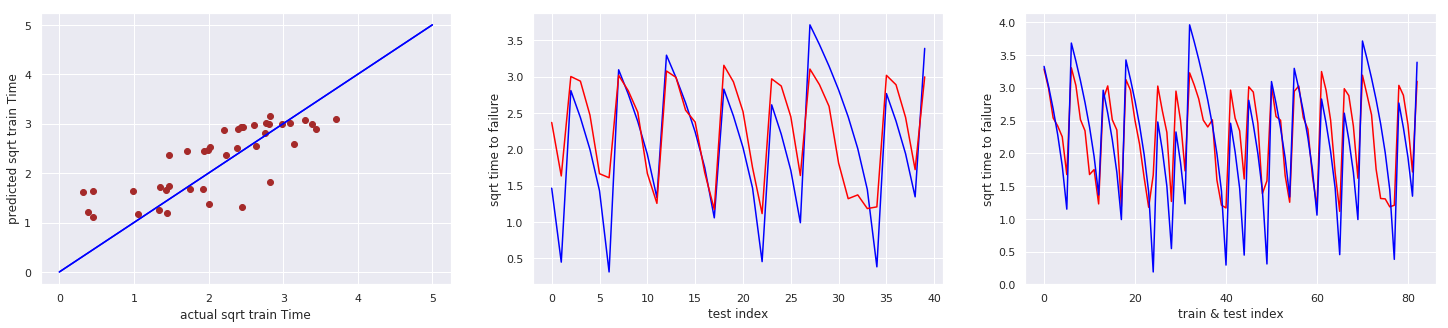

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.8313566301641828
r2_score: 0.6127301061981532


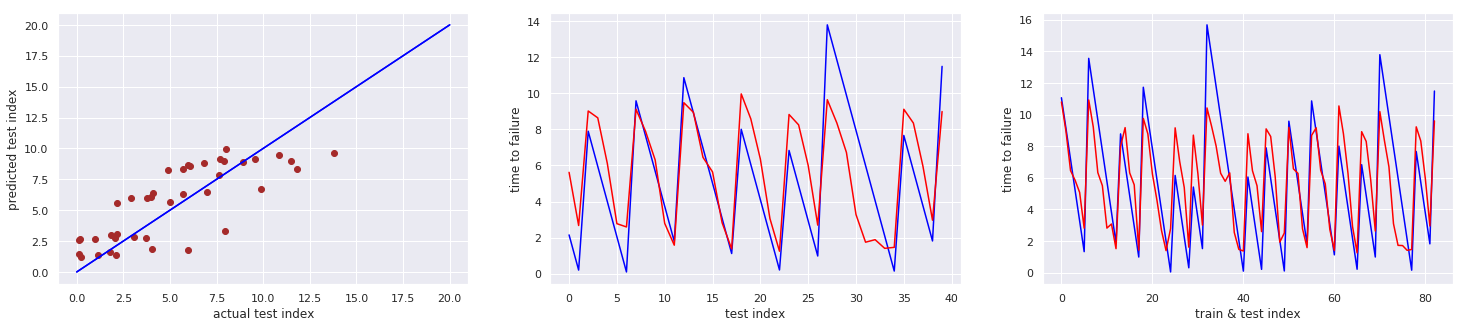

In [44]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
MAE_7 = mean_absolute_error(y_test_nolog, y_predict)
R2_7=r2_score(y_test_nolog, y_predict)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual test index')
ax1.set_ylabel('predicted test index')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

## R2 and MAE plot for diff time windows

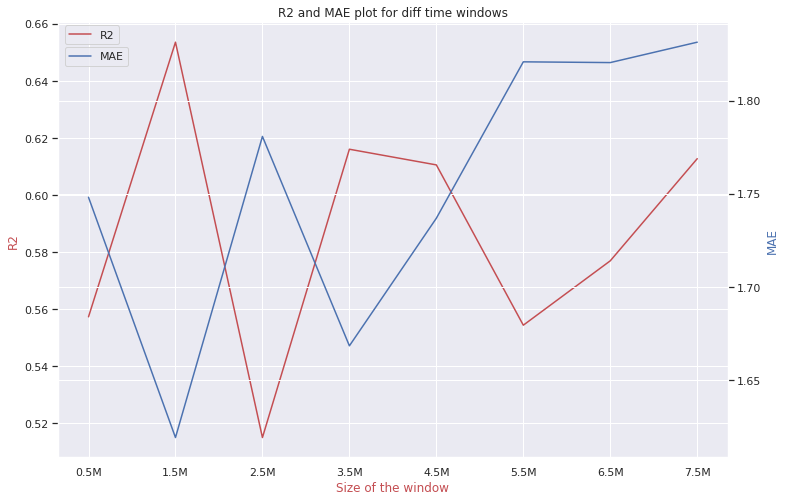

In [45]:
R2 = [R2_1,R2_0,  R2_2, R2_3, R2_4, R2_5, R2_6, R2_7]
MAE = [MAE_1,MAE_0,MAE_2,MAE_3,MAE_4,MAE_5,MAE_6,MAE_7]
x=["0.5M", "1.5M", "2.5M", "3.5M", "4.5M","5.5M", "6.5M", "7.5M"]
def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, x, title="R2 and MAE plot for diff time windows"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(x,train_ad_sample_df, color='r')
    ax1.set_ylabel('R2', color='r')
    plt.legend(['R2'], loc=(0.01, 0.95))
    ax1.set_xlabel('Size of the window', color='r')
    
    ax2 = ax1.twinx()
    plt.plot(x, train_ttf_sample_df, color='b')
    ax2.set_ylabel('MAE', color='b')
    plt.legend(['MAE'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(R2, MAE, x)

